In [1]:
import pandas as pd ### 데이터 분석을 하기 위한 파이썬 라이브러리 
import numpy as np ## 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 파이썬 라이브러리
import matplotlib.pyplot as plt # 시각화하는 라이브러리 
import seaborn as sns # 시각화
%matplotlib inline   

In [2]:
df=pd.read_csv("Life Expectancy Data (1).csv")

In [3]:
df.head(3) 

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant deaths,Alcohol,Hepatitis B,bmi,Polio,Total_expenditure,Population,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,65.0,19.1,6.0,8.16,33736494.0,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,62.0,18.6,58.0,8.18,327582.0,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,64.0,18.1,62.0,8.13,31731688.0,0.470,9.9


In [4]:
#### [2.2]: 데이터에서 변수의 의미를 살펴봅니다: Features(Columns/Attributes/Xs) Descriptions

#country: 나라

#Year: 연도

#Status: 지위

#Adult_Mortality: 남녀 모두의 성인 사망률(인구 1000명당 15세에서 60세 사이로 사망할 확률)

#Infant death: 인구 1000명당 유아 사망자 수

#Alcohol: 알코올, 1인당(15+) 소비량 기록

#Hepatitis B : 만 1세 B형 간염(HepB) 예방접종 적용범위(%)

#bmi: 평균 체질량지수

#Polio: 1세 소아 소아마비(Pol3) 예방 접종 범위(%)

#Total_expenditure: 전체 정부 지출에서 차지하는 보건 관련 일반 정부 지출 비율(%)

#Population: 인구 수

#Income_composition_of_resources: 자원의 소득 구성 측면에서의 인간 개발 지수

#Schooling: 취학 연수



In [5]:
sns.set_style('darkgrid')

In [6]:
df.shape

(2938, 14)

In [7]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult_Mortality                     10
infant deaths                        0
Alcohol                            194
Hepatitis B                        553
bmi                                 34
Polio                               19
Total_expenditure                  226
Population                         652
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_Expectancy                    0
Adult_Mortality                    0
infant deaths                      0
Alcohol                            0
Hepatitis B                        0
bmi                                0
Polio                              0
Total_expenditure                  0
Population                         0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [10]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 0 to 2937
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1657 non-null   object 
 1   Year                             1657 non-null   int64  
 2   Status                           1657 non-null   object 
 3   Life_Expectancy                  1657 non-null   float64
 4   Adult_Mortality                  1657 non-null   float64
 5   infant deaths                    1657 non-null   int64  
 6   Alcohol                          1657 non-null   float64
 7   Hepatitis B                      1657 non-null   float64
 8   bmi                              1657 non-null   float64
 9   Polio                            1657 non-null   float64
 10  Total_expenditure                1657 non-null   float64
 11  Population                       1657 non-null   float64
 12  Income_composition_o

In [11]:
df.describe() #각 column의 주요 통계 정보 확인

,Year,Life_Expectancy,Adult_Mortality,infant deaths,Alcohol,Hepatitis B,bmi,Polio,Total_expenditure,Population,Income_composition_of_resources,Schooling
count,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1.657000e+03,1657.000000,1657.000000
mean,2007.850935,69.299819,168.074231,32.444176,4.513271,79.161738,38.173325,83.421847,5.943808,1.460569e+07,0.631559,12.116295
std,4.086784,8.781483,125.150716,120.566224,4.029705,25.577115,19.748093,22.592244,2.300552,7.029555e+07,0.182654,2.790640
min,2000.000000,44.000000,1.000000,0.000000,0.010000,2.000000,2.000000,3.000000,0.740000,3.400000e+01,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.760000,74.000000,19.500000,81.000000,4.380000,1.918970e+05,0.511000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.760000,89.000000,43.800000,93.000000,5.830000,1.425221e+06,0.672000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.330000,96.000000,55.800000,97.000000,7.460000,7.592865e+06,0.750000,13.900000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,99.000000,77.100000,99.000000,14.390000,1.293859e+09,0.936000,20.700000


In [12]:
num_country=df['Country'].unique() # []은 column .uniaue 중복 확인
print(len(num_country))
num_country

133


array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cyprus',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania',
       'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia'

In [13]:
print(num_country)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium'
 'Belize' 'Benin' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Costa Rica' 'Croatia' 'Cyprus' 'Djibouti' 'Dominican Republic'
 'Ecuador' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Fiji' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'India'
 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kiribati' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 'Lithuania' 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives'
 'Mali' 'Malta' 'Mauritania' 'Mauritius' 'Mexico' 'Mongolia' 'Montenegro'
 'Morocco' 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Netherlands'
 'Nicaragua' 'N

In [14]:
df['Life_Expectancy'].describe()

count    1657.000000
mean       69.299819
std         8.781483
min        44.000000
25%        64.400000
50%        71.700000
75%        75.000000
max        89.000000
Name: Life_Expectancy, dtype: float64

<AxesSubplot:>

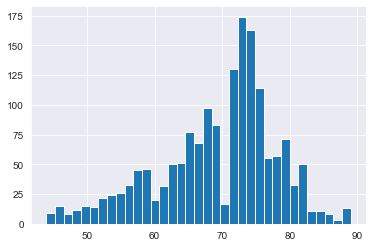

In [15]:
df['Life_Expectancy'].hist(bins=35)

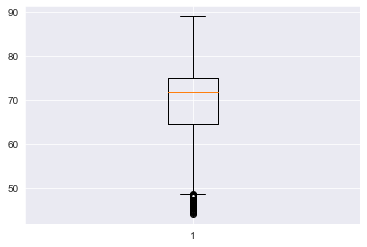

In [16]:
plt.boxplot(df['Life_Expectancy']) # 중간값. 제일 모여 있는 값
plt.show()

C:\Users\julia\AppData\Local\Temp/ipykernel_9848/3781951270.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[numerical_columns].hist(ax=ax)


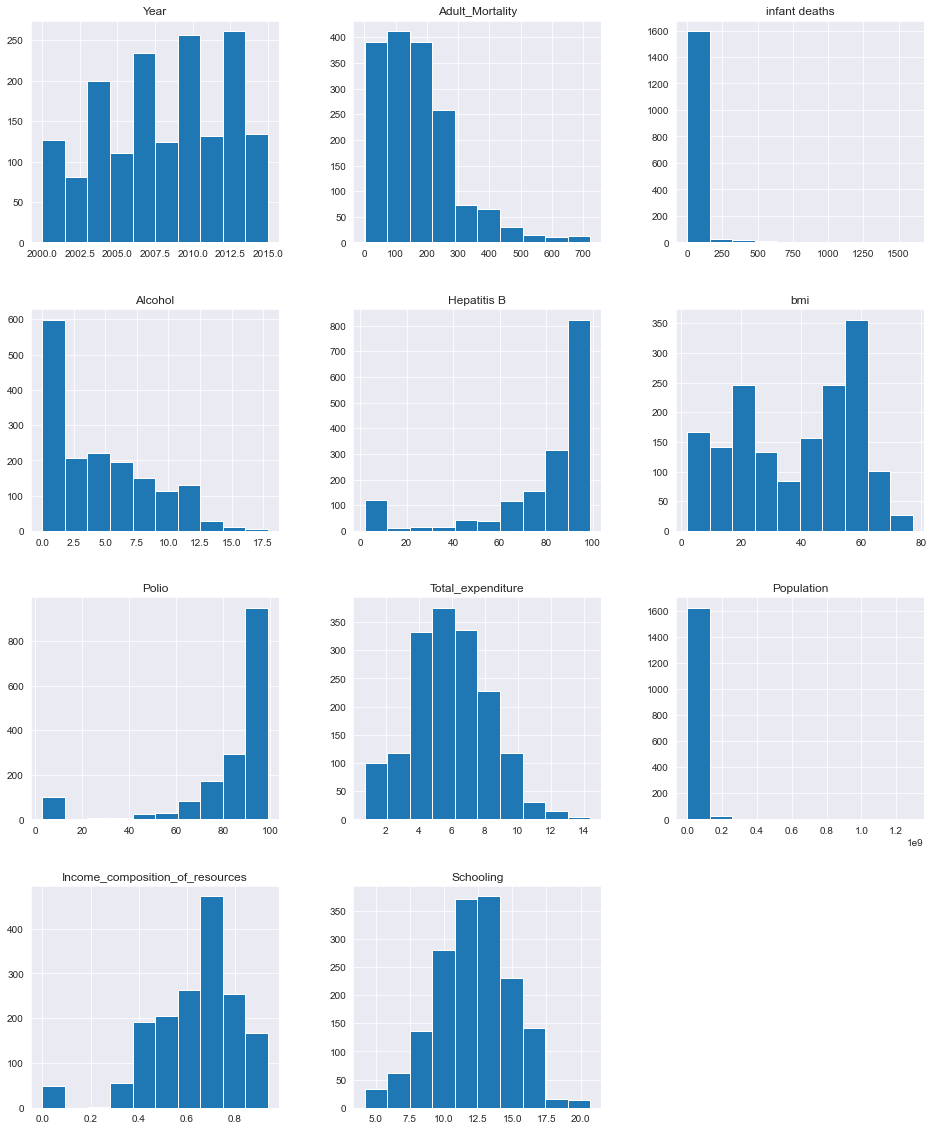

In [17]:
numerical_columns=['Year','Adult_Mortality','infant deaths','Alcohol','Hepatitis B',"bmi",'Polio','Total_expenditure','Population','Income_composition_of_resources','Schooling']

### figsize()는 plot()의 기본 크기를 지정합니다. 
fig = plt.figure(figsize = (16, 20))
ax = fig.gca()  # Axes 생성

### gca() # x축 선언
### gca()로 현재의 Axes를, gcf()로 현재의 Figure 객체를 구할 수 있다.

df[numerical_columns].hist(ax=ax)
plt.show()

In [18]:
cols = ['Life_Expectancy','Year','Adult_Mortality','infant deaths','Alcohol','Hepatitis B',"bmi",'Polio','Total_expenditure','Population','Income_composition_of_resources','Schooling']

corr = df[cols].corr(method = 'pearson')
corr

,Life_Expectancy,Year,Adult_Mortality,infant deaths,Alcohol,Hepatitis B,bmi,Polio,Total_expenditure,Population,Income_composition_of_resources,Schooling
Life_Expectancy,1.000000,0.049783,-0.701085,-0.168918,0.401946,0.200912,0.539432,0.326294,0.174391,-0.022272,0.720750,0.726849
Year,0.049783,1.000000,-0.037968,0.007336,-0.115505,0.112543,0.007884,-0.022700,0.055879,0.011806,0.122543,0.088388
Adult_Mortality,-0.701085,-0.037968,1.000000,0.042675,-0.173753,-0.104831,-0.350715,-0.195481,-0.083500,-0.014721,-0.442009,-0.421468
infant deaths,-0.168918,0.007336,0.042675,1.000000,-0.105025,-0.231046,-0.234319,-0.154273,-0.145481,0.671803,-0.134754,-0.214038
Alcohol,0.401946,-0.115505,-0.173753,-0.105025,1.000000,0.111907,0.349281,0.244289,0.219070,-0.028121,0.559614,0.616334
Hepatitis B,0.200912,0.112543,-0.104831,-0.231046,0.111907,1.000000,0.140768,0.463044,0.115247,-0.129231,0.184872,0.215747
bmi,0.539432,0.007884,-0.350715,-0.234319,0.349281,0.140768,1.000000,0.179128,0.186048,-0.081532,0.509257,0.552555
Polio,0.326294,-0.022700,-0.195481,-0.154273,0.244289,0.463044,0.179128,1.000000,0.125663,-0.043925,0.311944,0.347370
Total_expenditure,0.174391,0.055879,-0.083500,-0.145481,0.219070,0.115247,0.186048,0.125663,1.000000,-0.078898,0.183042,0.244104
Population,-0.022272,0.011806,-0.014721,0.671803,-0.028121,-0.129231,-0.081532,-0.043925,-0.078898,1.000000,-0.008151,-0.040232


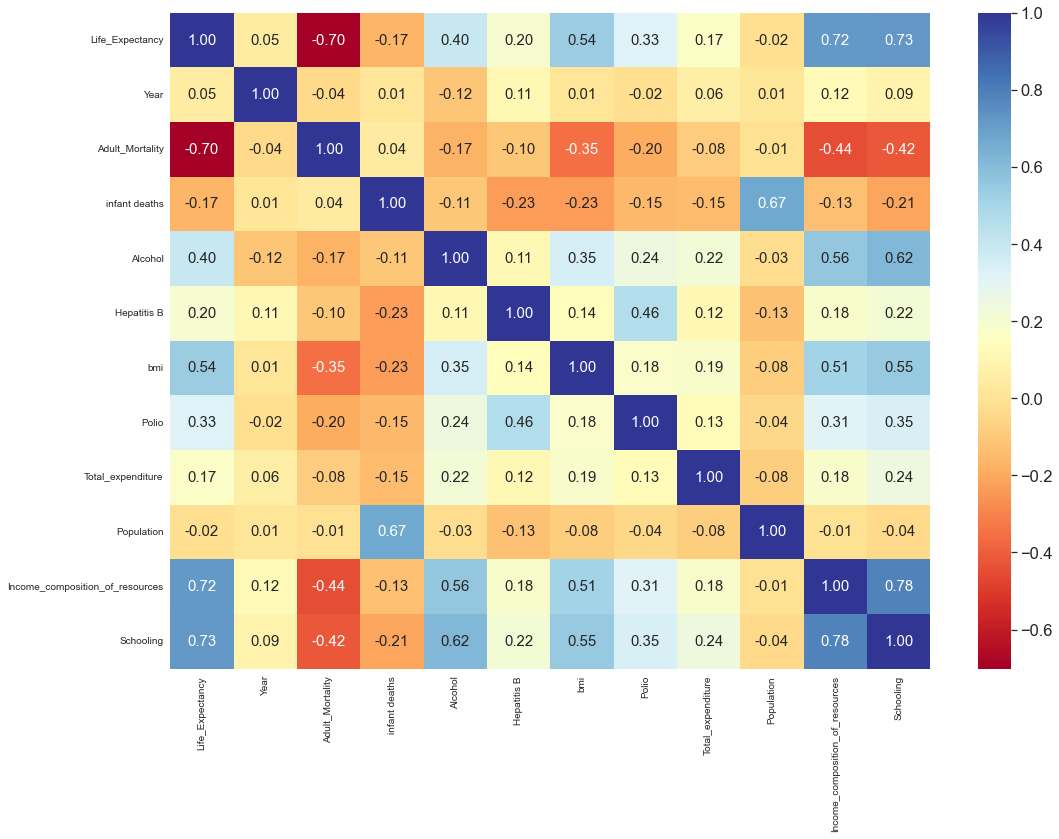

In [19]:
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "RdYlBu")
plt.tight_layout() ## 여백을 조정합니다. 

plt.show()

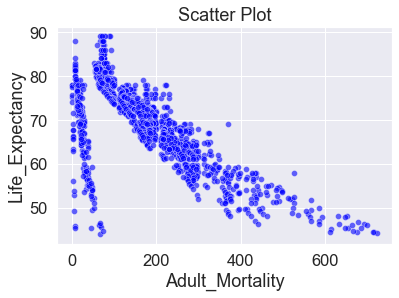

In [20]:
sns.scatterplot(data=df, x='Adult_Mortality', y='Life_Expectancy', markers='o', color='blue', alpha=0.6) 
plt.title('Scatter Plot')
plt.show()

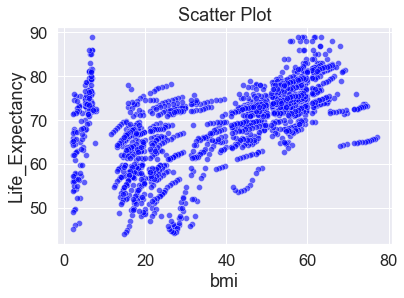

In [21]:
sns.scatterplot(data=df, x='bmi', y='Life_Expectancy', markers='o', color='blue', alpha=0.6) 
plt.title('Scatter Plot')
plt.show()

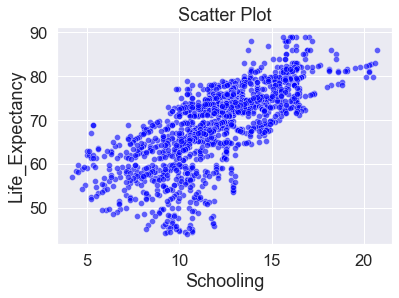

In [22]:
sns.scatterplot(data=df, x='Schooling', y='Life_Expectancy', markers='o', color='blue', alpha=0.6) 
plt.title('Scatter Plot')
plt.show()

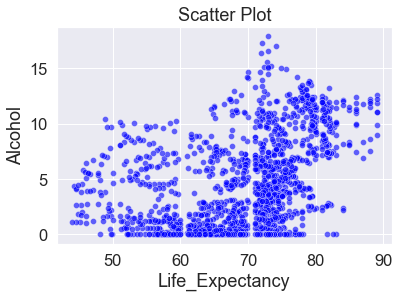

In [23]:
sns.scatterplot(data=df, y='Alcohol', x='Life_Expectancy', markers='o', color='blue', alpha=0.6) 
plt.title('Scatter Plot')
plt.show()

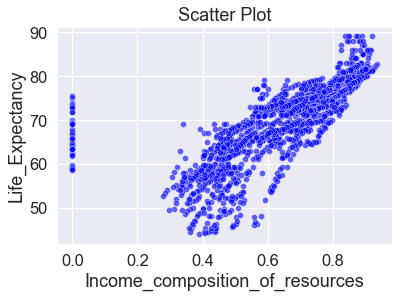

In [24]:
sns.scatterplot(data=df, x='Income_composition_of_resources', y='Life_Expectancy', markers='o', color='blue', alpha=0.6) 
plt.title('Scatter Plot')
plt.show()

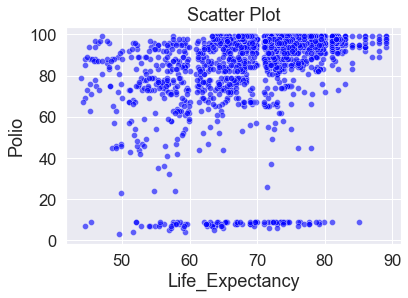

In [25]:
sns.scatterplot(data=df, y='Polio', x='Life_Expectancy', markers='o', color='blue', alpha=0.6) 
plt.title('Scatter Plot')
plt.show()

In [26]:
df['Country'].value_counts() 

Afghanistan          16
Albania              16
Mongolia             15
Mexico               15
Mauritius            15
                     ..
Namibia               5
Sweden                4
Netherlands           4
Haiti                 2
Equatorial Guinea     1
Name: Country, Length: 133, dtype: int64

<AxesSubplot:>

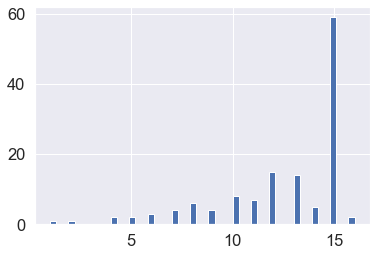

In [27]:
df['Country'].value_counts().hist(bins=50)

<AxesSubplot:xlabel='Life_Expectancy', ylabel='Country'>

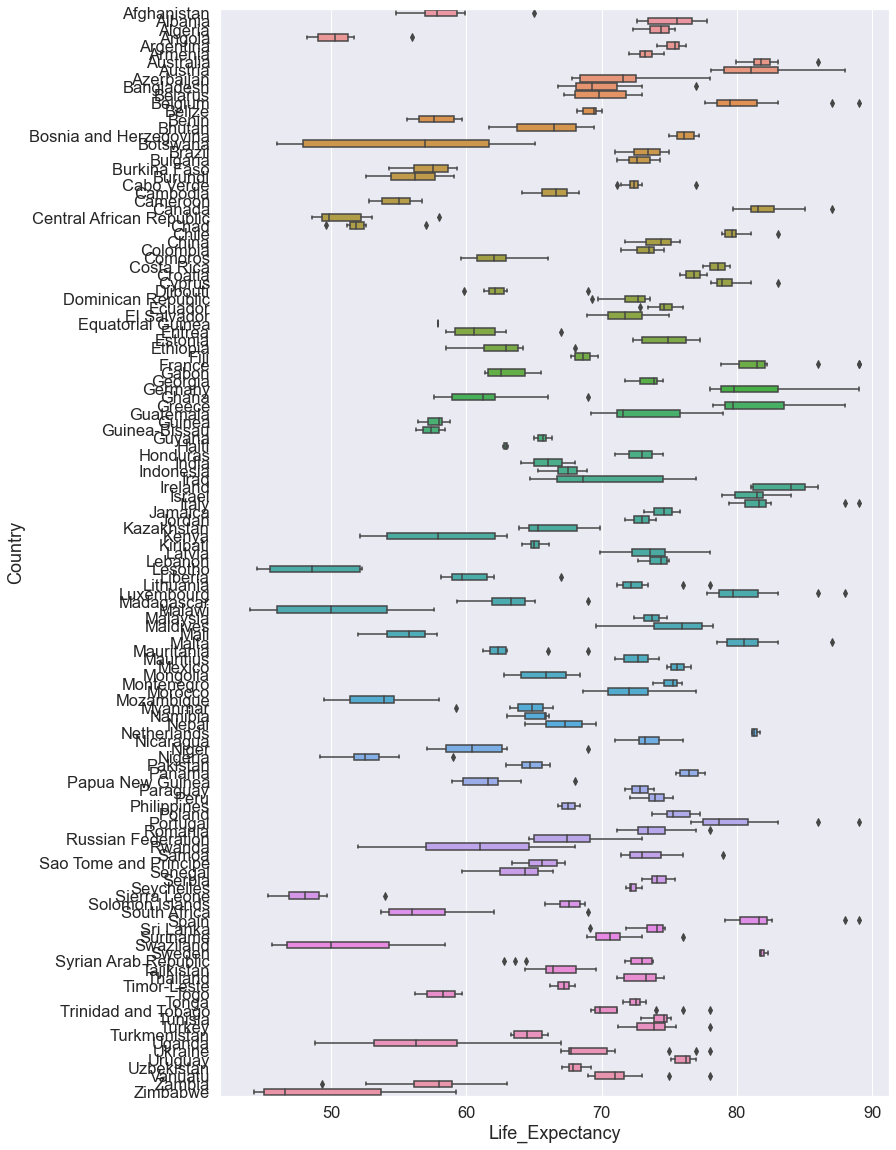

In [28]:
fig = plt.figure(figsize = (12, 20))
sns.boxplot(x='Life_Expectancy', y='Country', data=df)

<AxesSubplot:xlabel='Year', ylabel='Life_Expectancy'>

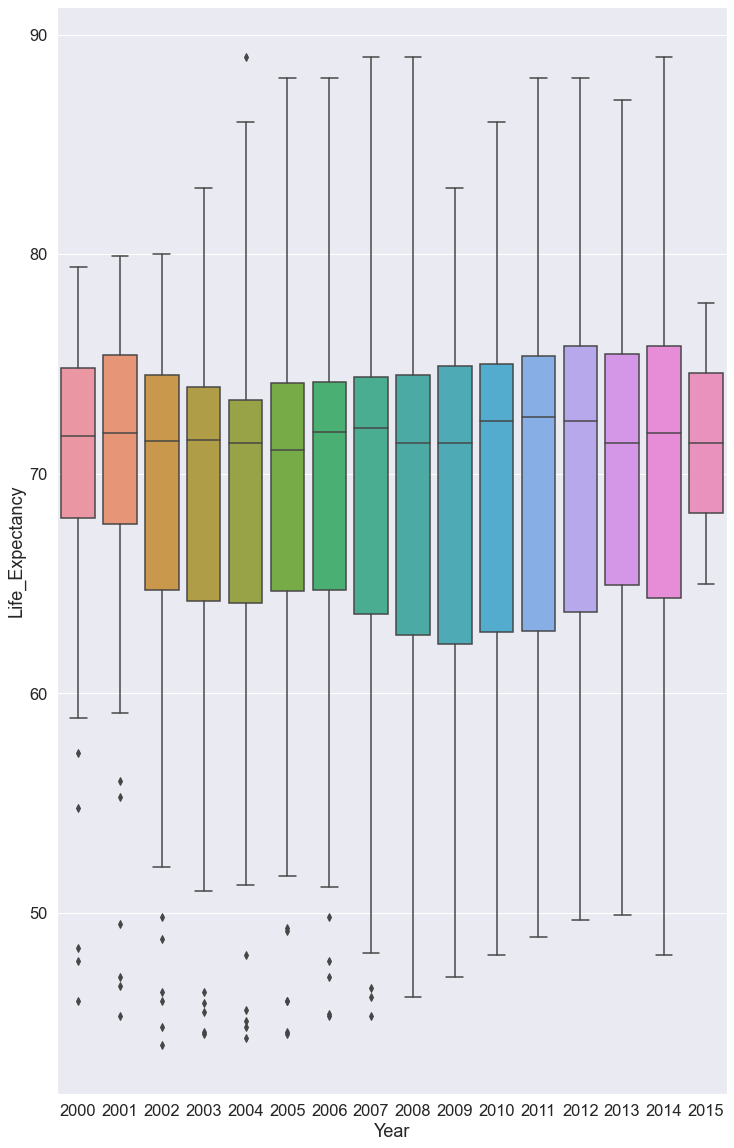

In [29]:
fig = plt.figure(figsize = (12, 20))
sns.boxplot(x='Year', y='Life_Expectancy', data=df)

In [30]:
df.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant deaths,Alcohol,Hepatitis B,bmi,Polio,Total_expenditure,Population,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,65.0,19.1,6.0,8.16,33736494.0,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,62.0,18.6,58.0,8.18,327582.0,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,64.0,18.1,62.0,8.13,31731688.0,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,67.0,17.6,67.0,8.52,3696958.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,68.0,17.2,68.0,7.87,2978599.0,0.454,9.5


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 0 to 2937
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1657 non-null   object 
 1   Year                             1657 non-null   int64  
 2   Status                           1657 non-null   object 
 3   Life_Expectancy                  1657 non-null   float64
 4   Adult_Mortality                  1657 non-null   float64
 5   infant deaths                    1657 non-null   int64  
 6   Alcohol                          1657 non-null   float64
 7   Hepatitis B                      1657 non-null   float64
 8   bmi                              1657 non-null   float64
 9   Polio                            1657 non-null   float64
 10  Total_expenditure                1657 non-null   float64
 11  Population                       1657 non-null   float64
 12  Income_composition_o

In [32]:
from sklearn.preprocessing import StandardScaler

### feature standardization  (numerical_columns except dummy var.-"CHAS")

scaler = StandardScaler()  # 평균 0, 분산 1
scale_columns = ['Year','Adult_Mortality','infant deaths','Alcohol','Hepatitis B',"bmi",'Polio','Total_expenditure','Population','Income_composition_of_resources','Schooling']
df[scale_columns] = scaler.fit_transform(df[scale_columns]) # fit =run, transform = compile

In [33]:
df.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant deaths,Alcohol,Hepatitis B,bmi,Polio,Total_expenditure,Population,Income_composition_of_resources,Schooling
0,Afghanistan,1.749841,Developing,65.0,0.758721,0.245216,-1.117856,-0.553855,-0.966123,-3.427956,0.963621,0.272230,-0.835490,-0.722739
1,Afghanistan,1.505076,Developing,59.9,0.822663,0.261809,-1.117856,-0.671183,-0.991449,-1.125586,0.972318,-0.203177,-0.851919,-0.758584
2,Afghanistan,1.260311,Developing,59.9,0.798684,0.278403,-1.117856,-0.592964,-1.016776,-0.948481,0.950577,0.243702,-0.884778,-0.794428
3,Afghanistan,1.015546,Developing,59.5,0.830656,0.303293,-1.117856,-0.475637,-1.042102,-0.727099,1.120153,-0.155231,-0.923114,-0.830273
4,Afghanistan,0.770781,Developing,59.2,0.854634,0.319886,-1.117856,-0.436527,-1.062364,-0.682823,0.837527,-0.165453,-0.972402,-0.937808


In [34]:
df[scale_columns].head()

,Year,Adult_Mortality,infant deaths,Alcohol,Hepatitis B,bmi,Polio,Total_expenditure,Population,Income_composition_of_resources,Schooling
0,1.749841,0.758721,0.245216,-1.117856,-0.553855,-0.966123,-3.427956,0.963621,0.272230,-0.835490,-0.722739
1,1.505076,0.822663,0.261809,-1.117856,-0.671183,-0.991449,-1.125586,0.972318,-0.203177,-0.851919,-0.758584
2,1.260311,0.798684,0.278403,-1.117856,-0.592964,-1.016776,-0.948481,0.950577,0.243702,-0.884778,-0.794428
3,1.015546,0.830656,0.303293,-1.117856,-0.475637,-1.042102,-0.727099,1.120153,-0.155231,-0.923114,-0.830273
4,0.770781,0.854634,0.319886,-1.117856,-0.436527,-1.062364,-0.682823,0.837527,-0.165453,-0.972402,-0.937808


In [35]:
df[numerical_columns].head()

,Year,Adult_Mortality,infant deaths,Alcohol,Hepatitis B,bmi,Polio,Total_expenditure,Population,Income_composition_of_resources,Schooling
0,1.749841,0.758721,0.245216,-1.117856,-0.553855,-0.966123,-3.427956,0.963621,0.272230,-0.835490,-0.722739
1,1.505076,0.822663,0.261809,-1.117856,-0.671183,-0.991449,-1.125586,0.972318,-0.203177,-0.851919,-0.758584
2,1.260311,0.798684,0.278403,-1.117856,-0.592964,-1.016776,-0.948481,0.950577,0.243702,-0.884778,-0.794428
3,1.015546,0.830656,0.303293,-1.117856,-0.475637,-1.042102,-0.727099,1.120153,-0.155231,-0.923114,-0.830273
4,0.770781,0.854634,0.319886,-1.117856,-0.436527,-1.062364,-0.682823,0.837527,-0.165453,-0.972402,-0.937808


In [36]:
from sklearn.model_selection import train_test_split

# split dataset into training & test
X = df[numerical_columns]
y = df['Life_Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # train이 8, test가 2

In [37]:
X_train.shape, y_train.shape

((1325, 11), (1325,))

In [38]:
X_test.shape, y_test.shape

((332, 11), (332,))

In [39]:
y_train

942     79.3
1655    62.2
1443    74.4
1786    65.2
1611    75.0
        ... 
1275    84.0
1577    50.0
1866    73.2
356     74.1
1783    65.9
Name: Life_Expectancy, Length: 1325, dtype: float64

In [40]:
X_train

,Year,Adult_Mortality,infant deaths,Alcohol,Hepatitis B,bmi,Polio,Total_expenditure,Population,Income_composition_of_resources,Schooling
942,-1.187340,-0.552095,-0.244290,2.228312,-2.000897,0.923237,0.556915,-1.962647,0.677903,1.207240,1.177041
1655,0.770781,0.351089,-0.202806,-1.117856,-0.162762,-0.510245,-0.461441,-1.336521,-0.154936,-0.791678,-1.583016
1443,1.505076,-0.096507,-0.269180,-1.117856,0.502095,-1.594221,0.379809,-0.027744,-0.179467,1.042945,1.392110
1786,0.281251,0.343096,0.162249,-1.050833,0.462986,-0.966123,-3.295127,-1.497401,-0.207129,-0.698578,-1.296257
1611,-0.453044,-0.640016,-0.269180,-0.718203,0.736750,-0.986384,0.645467,0.620122,-0.207833,-0.052352,-0.041686
...,...,...,...,...,...,...,...,...,...,...,...
1275,-0.453044,-0.799871,-0.260883,-0.566781,0.658532,1.161307,0.468362,0.624470,-0.207731,1.305817,1.284576
1577,0.036486,2.852828,0.029502,-0.805084,0.462986,-1.077560,0.379809,-1.845248,-0.004759,-1.268132,-0.901963
1866,0.526016,-0.112492,-0.244290,-0.281314,0.736750,-1.670201,0.689744,0.276622,-0.126191,-0.096164,-0.256755
356,0.770781,-0.128478,0.153952,0.761260,0.736750,0.740886,0.645467,1.285380,2.619463,0.506249,0.675212


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame() 
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1) 

,features,VIF Factor
0,Year,1.1
1,Adult_Mortality,1.3
2,infant deaths,1.7
3,Alcohol,1.9
4,Hepatitis B,1.3
5,bmi,1.5
6,Polio,1.4
7,Total_expenditure,1.1
8,Population,1.5
9,Income_composition_of_resources,2.9


In [42]:
from sklearn import linear_model

In [43]:
# fit regression model in training set #실행
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# predict in test set
pred_test = lr.predict(X_test)

In [44]:
print(lr.coef_) 

[-0.28354798 -3.68410635 -0.33137791 -0.42115479  0.09131254  0.79161792
  0.45530265  0.03316179  0.22814299  2.37845933  2.59434471]


In [45]:
coefs = pd.DataFrame(zip(df[numerical_columns].columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs

,feature,coefficients
0,Year,-0.283548
1,Adult_Mortality,-3.684106
2,infant deaths,-0.331378
3,Alcohol,-0.421155
4,Hepatitis B,0.091313
5,bmi,0.791618
6,Polio,0.455303
7,Total_expenditure,0.033162
8,Population,0.228143
9,Income_composition_of_resources,2.378459


In [46]:
coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
1,Adult_Mortality,-3.684106
10,Schooling,2.594345
9,Income_composition_of_resources,2.378459
5,bmi,0.791618
6,Polio,0.455303
3,Alcohol,-0.421155
2,infant deaths,-0.331378
0,Year,-0.283548
8,Population,0.228143
4,Hepatitis B,0.091313


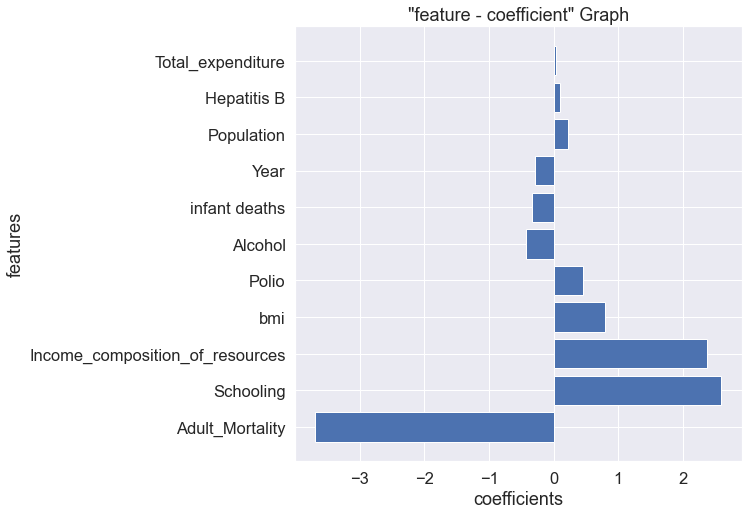

In [47]:
### coefficients 를 시각화 합니다. 

### figure size
plt.figure(figsize = (8, 8))

### bar plot : matplotlib.pyplot 모듈의 barh() 함수를 사용해서 수평 막대 그래프를 그릴 수 있습니다. 
plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

In [48]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)
### 회귀분석모형 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수 데이터에 추가하는 것을 상수항 결합(bias augmentation)작업이라고 합니다.

### ordinary least square 의 약자로, 거리의 최소값을 기준으로 구하는 함수입니다. 
model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

#p value가 0.5보다 작을 때가 중요

C:\Users\julia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     352.8
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:19:31   Log-Likelihood:                -3857.8
No. Observations:                1325   AIC:                             7740.
Df Residuals:                    1313   BIC:                             7802.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              69.2764      0.123    563.501      0.000      69.035      69.518
Year                               -0.2835      0.130     -2.180      0.029      -0.539      -0.028
Adult_Mortality                    -3.6841      0.141    -26.137      0.000      -3.961      -3.408
infant deaths                      -0.3314      0.166     -1.991      0.047      -0.658      -0.005
Alcohol                            -0.4212      0.165     -2.551      0.011      -0.745      -0.097
Hepatitis B                         0.0913      0.142      0.642      0.521      -0.188       0.370
bmi                                 0.7916      0.150      5.293      0.000       0.498       1.085
Polio                               0.4553      0.146      3.113      0.002       0.168       0.742
Total_expenditure                   0.0332      0.128      0.259      0.796      -0.218       0.285
Population                          0.2281      0.201      1.133      0.257      -0.167       0.623
Income_composition_of_resources     2.3785      0.207     11.518      0.000       1.973       2.784
Schooling                           2.5943      0.228     11.402      0.000       2.148       3.041
==============================================================================
Omnibus:                      284.553   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1058.414
Skew:                          -1.003   Prob(JB):                    1.47e-230
Kurtosis:                       6.892   Cond. No.                         4.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
X_train2

,const,Year,Adult_Mortality,infant deaths,Alcohol,Hepatitis B,bmi,Polio,Total_expenditure,Population,Income_composition_of_resources,Schooling
942,1.0,-1.187340,-0.552095,-0.244290,2.228312,-2.000897,0.923237,0.556915,-1.962647,0.677903,1.207240,1.177041
1655,1.0,0.770781,0.351089,-0.202806,-1.117856,-0.162762,-0.510245,-0.461441,-1.336521,-0.154936,-0.791678,-1.583016
1443,1.0,1.505076,-0.096507,-0.269180,-1.117856,0.502095,-1.594221,0.379809,-0.027744,-0.179467,1.042945,1.392110
1786,1.0,0.281251,0.343096,0.162249,-1.050833,0.462986,-0.966123,-3.295127,-1.497401,-0.207129,-0.698578,-1.296257
1611,1.0,-0.453044,-0.640016,-0.269180,-0.718203,0.736750,-0.986384,0.645467,0.620122,-0.207833,-0.052352,-0.041686
...,...,...,...,...,...,...,...,...,...,...,...,...
1275,1.0,-0.453044,-0.799871,-0.260883,-0.566781,0.658532,1.161307,0.468362,0.624470,-0.207731,1.305817,1.284576
1577,1.0,0.036486,2.852828,0.029502,-0.805084,0.462986,-1.077560,0.379809,-1.845248,-0.004759,-1.268132,-0.901963
1866,1.0,0.526016,-0.112492,-0.244290,-0.281314,0.736750,-1.670201,0.689744,0.276622,-0.126191,-0.096164,-0.256755
356,1.0,0.770781,-0.128478,0.153952,0.761260,0.736750,0.740886,0.645467,1.285380,2.619463,0.506249,0.675212


In [50]:
df = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)
df.head()

,actual,prediction
0,44.6,46.995531
1,45.6,67.727152
2,46.4,52.507729
3,46.4,52.674357
4,47.8,54.281320


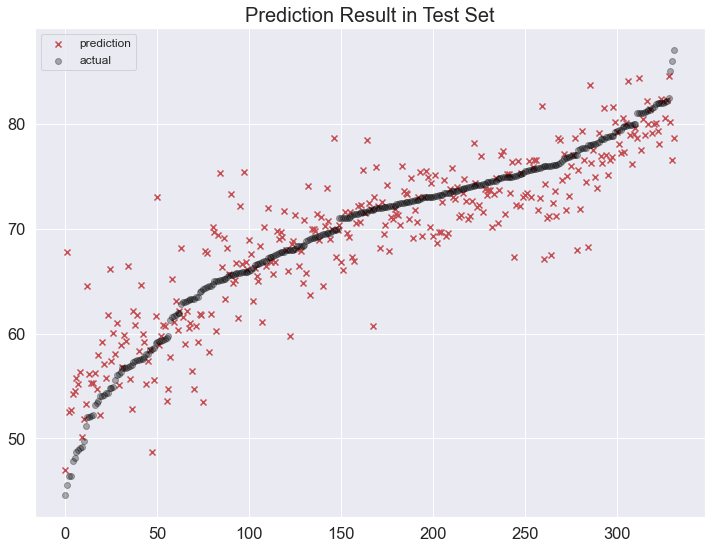

In [51]:
plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

In [52]:
### R square
print(model.score(X_train, y_train))  # training set
print(model.score(X_test, y_test))  # test set

0.7471873761893497
0.790194904464288


In [53]:
# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

# training set
pred_train = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train)))

# test set
print(sqrt(mean_squared_error(y_test, pred_test)))

4.44870179038621
3.891866268189141


In [54]:
print(lr.coef_, lr.intercept_)

[-0.28354798 -3.68410635 -0.33137791 -0.42115479  0.09131254  0.79161792
  0.45530265  0.03316179  0.22814299  2.37845933  2.59434471] 69.27638743704895
